# DBSCAN

<span>DBSCAN stands for density-based spatial clustering of applications with noise. The algorithim select random points on the hyperplane and if the points is connected to greater than n points within a defined disctance, the algorithim defines the points a a core sample. If the point is not a core sample it is defined as Noise. Then another point is chosen by the algorithim. Once all the point are marked as sample or noise the algorithim stops.</span>

### Import Preliminaries

In [71]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import modules
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sns
import warnings

from sklearn.cluster import DBSCAN
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting options
mpl.rcParams['figure.figsize'] = (9.0, 3.0)

# Set warning options
warnings.filterwarnings('ignore');

### Import Data

In [72]:
# Import Data
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split the data
train_x, test_x, train_y, test_y = train_test_split(X,y)

wdf = pd.DataFrame(wine.data, columns=wine['feature_names'])
wdf = pd.concat([wdf, pd.DataFrame(wine.target, columns=['target'])], axis=1)
wdf.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.230,1.710,2.430,15.600,127.000,2.800,3.060,0.280,2.290,5.640,1.040,3.920,1065.000,0
1,13.200,1.780,2.140,11.200,100.000,2.650,2.760,0.260,1.280,4.380,1.050,3.400,1050.000,0
2,13.160,2.360,2.670,18.600,101.000,2.800,3.240,0.300,2.810,5.680,1.030,3.170,1185.000,0
3,14.370,1.950,2.500,16.800,113.000,3.850,3.490,0.240,2.180,7.800,0.860,3.450,1480.000,0
4,13.240,2.590,2.870,21.000,118.000,2.800,2.690,0.390,1.820,4.320,1.040,2.930,735.000,0


### Preprocessing

In [73]:
# Scale the data
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

wdf = pd.DataFrame(train_x, columns=wine['feature_names'])
wdf = pd.concat([wdf, pd.DataFrame(train_y, columns=['target'])], axis=1)
wdf.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.068,-0.516,0.248,-1.694,0.798,2.468,1.669,-0.377,0.429,0.960,0.201,0.881,1.508,0
1,-0.170,-0.014,0.172,1.357,-0.092,-1.783,-0.960,-0.766,-1.379,0.351,-1.336,-1.813,-0.580,2
2,-0.807,0.756,-0.552,-0.473,-0.777,0.864,0.925,0.635,2.062,-1.182,2.001,0.271,-1.091,1
3,-1.701,-0.247,3.333,2.730,1.346,1.378,2.999,0.790,0.429,0.486,-0.151,1.491,-0.895,1
4,-1.211,-1.107,-0.209,0.442,0.113,1.689,0.082,-1.855,0.046,-0.772,0.113,0.697,0.500,1


### Ground Truth

In [74]:
# Target clases
train_y

array([0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 1,
       0, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1,
       2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1,
       2])

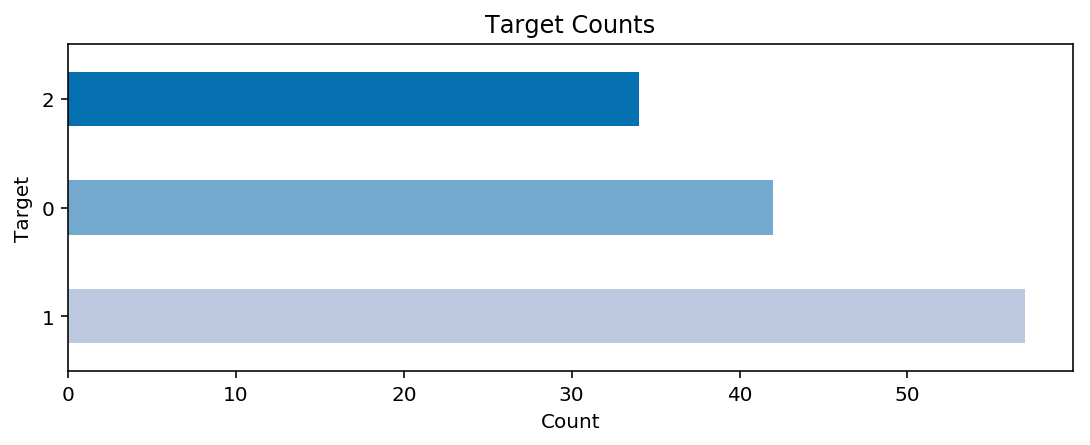

In [76]:
# Plot Target Counts 
target_counts = pd.Series(train_y).value_counts()
target_counts.plot.barh(colors=['#bdc9e1','#74a9cf','#0570b0']);
plt.title('Target Counts')
plt.xlabel('Count')
plt.ylabel('Target');

### Fit the Model

In [101]:
# Fit the model
dbscan = DBSCAN(eps=2.12, min_samples=5)
dbscan.fit(train_x)

DBSCAN(algorithm='auto', eps=2.12, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

Dbscan has not predict method. There are no centroide in the dbscan algorithim but we can use the fit_transform method a piece of the data.

### Clusters

In [102]:
#View training predictions
pred_train_y = dbscan.fit_predict(train_x)
pred_train_y

array([ 0, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0, -1,  1, -1, -1,  0,
       -1,  0, -1,  1, -1,  0,  1, -1, -1,  2,  1,  0, -1,  0,  0,  0,  1,
       -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1, -1,  0, -1, -1, -1,
        1,  0, -1, -1, -1, -1, -1,  0, -1, -1,  2,  0,  0,  0, -1, -1, -1,
       -1,  2,  0, -1, -1, -1, -1,  2,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        1,  0,  1,  1,  0, -1,  0,  0, -1, -1, -1,  0,  1, -1, -1,  1, -1,
        0,  0,  0, -1,  0,  0, -1,  0, -1,  2, -1,  0,  0, -1,  0,  1,  0,
       -1,  0, -1, -1,  2,  0,  0, -1, -1,  0,  0,  0, -1,  1])

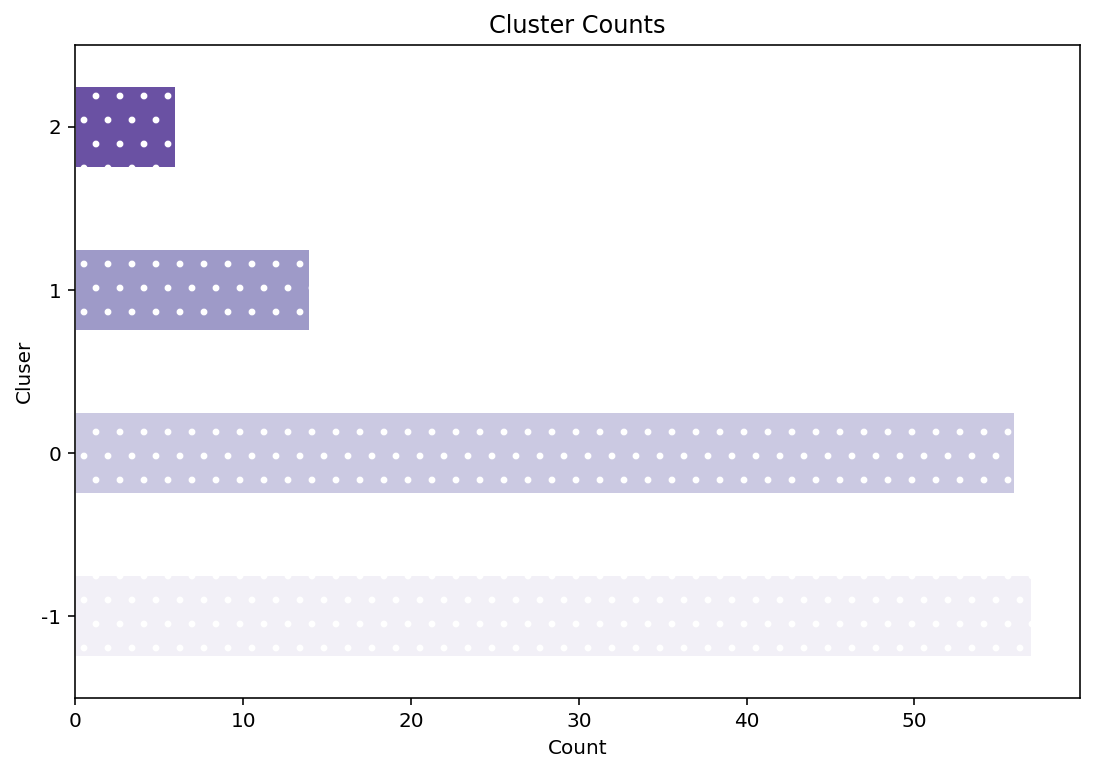

In [120]:
# Plot Cluster Counts 
target_counts = pd.Series(pred_train_y).value_counts()
target_counts.plot.barh(colors=['#f2f0f7','#cbc9e2','#9e9ac8','#6a51a3'], 
                        edgecolor='white',hatch='.');
plt.title('Cluster Counts')
plt.xlabel('Count')
plt.ylabel('Cluser');

### EPS Sensitivity

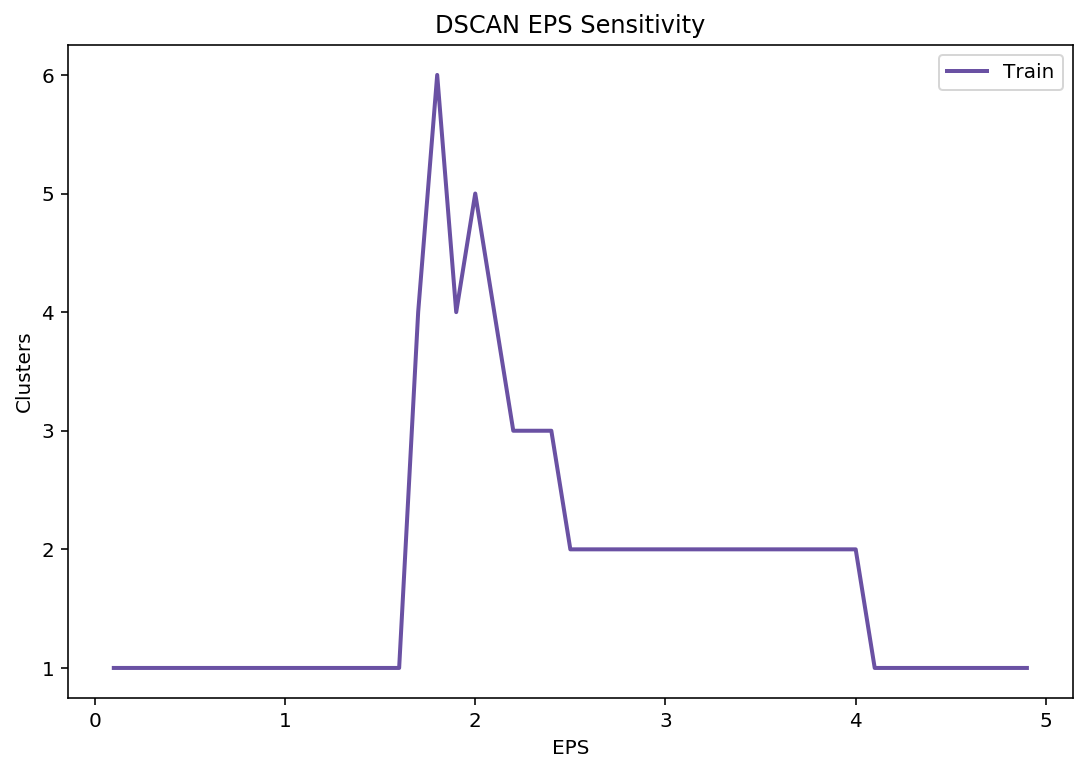

In [128]:
# Define paraameter range and score lists
eps_range = np.arange(0, 5,0.1)[1:]
clusters = []

# Train a knn_model for every neighbour value in our list
for i in eps_range:
    dbscan=DBSCAN(eps = i).fit(train_x,train_y)
    clusters.append(len((np.unique(dbscan.fit_predict(train_x)))))

# Plot our results
mpl.rcParams['figure.figsize'] = (9.0, 6.0)
plt.plot(eps_range,clusters,label="Train",linewidth=2, color='#6A51A3') 
plt.legend()
plt.title('DSCAN EPS Sensitivity')
plt.xlabel('EPS')
plt.ylabel('Clusters');

### Min Samples Sensitivety

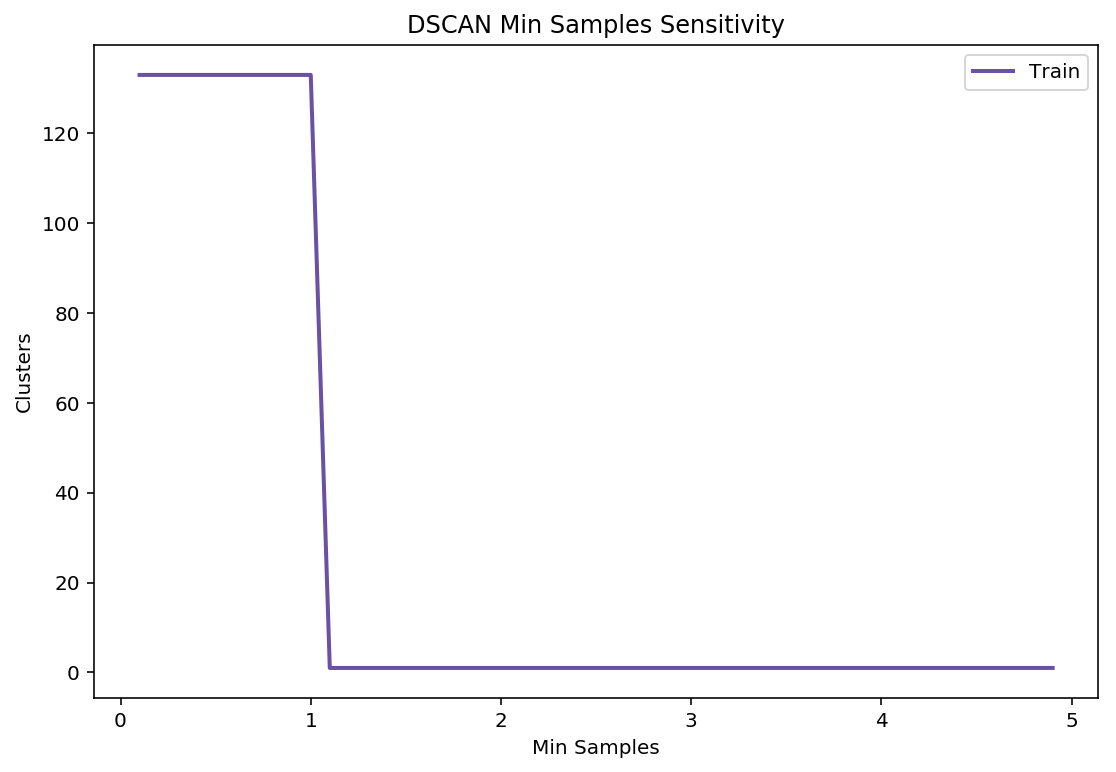

In [126]:
# Define paraameter range and score lists
min_samples_range = np.arange(0, 5,0.1)[1:]
clusters = []

# Train a knn_model for every neighbour value in our list
for i in min_samples_range:
    dbscan = DBSCAN(min_samples=i).fit(train_x, train_y)
    clusters.append(len((np.unique(dbscan.fit_predict(train_x)))))

# Plot our results
mpl.rcParams['figure.figsize'] = (9.0, 6.0)
plt.plot(min_samples_range, clusters, label="Train", linewidth=2, color='#6A51A3')
plt.legend()
plt.title('DSCAN Min Samples Sensitivity')
plt.xlabel('Min Samples')
plt.ylabel('Clusters');

### General Notes

- Points within dense regions of the data are core samples
- Points within sparse regions of thed data are boundry sample
- DBSCAN can classify points that are not labelled in any cluster as noise in the data- You can treat noise as an anomoly in the data and use this algorithim for anomonly detection
- Make sure you scale the data durinp preprocessing to makes sure the data is in the same range

Author: Kavi Sekhon